In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric

# Convert output sets to format compatibile with scripts to calculate metrics

## Molpher

In [14]:
receptor = 'Leukocyte_elastase' 
type_cluster = 'dis'
number = 4

In [15]:
df = pd.read_csv(f"data/output_sets_new/{receptor}/cOS_Molpher_{type_cluster}_{number}_all_columns.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COCCCN1C(=O)N(C2=CC=CC(C(F)(F)F)=C2)C2=C(C(=O)...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
1,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COCCCN1C(=O)N(C2=CC=CC(C(F)(F)F)=C2)C(C)=C(C(C...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
2,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COCCCN1C(=O)N(C2=CC=CC(C(F)(F)F)=C2)C(C)=C(C(=...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
3,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COCCCCN1C(=O)N(C2=CC=CC(C(F)(F)F)=C2)C(C)=C(C(...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
4,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COC(=O)C1=C(C)N(C2=CC=CC(C(F)(F)F)=C2)C(=O)N(C...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
...,...,...,...,...,...,...,...,...,...,...
1721136,CHEMBL293138,CHEMBL408621,CC(SC(=O)c1cccs1)C(=O)NCC(=O)N1CSCC1C(=O)O,CC1(C)C2CC[C@]1(C)C(OC(=O)/C=C/c1cc(O)c(O)c(O)...,CC1=CC(C=CC(=O)OC2CC3CCC2(C)C3(C)C)=CC=C1O,0.199458,76,2319.140899,C(CCCC1CCCC1)CCCC1CCCC1,C1CCC(CCCCC2CC3CCC2C3)CC1
1721137,CHEMBL293138,CHEMBL408621,CC(SC(=O)c1cccs1)C(=O)NCC(=O)N1CSCC1C(=O)O,CC1(C)C2CC[C@]1(C)C(OC(=O)/C=C/c1cc(O)c(O)c(O)...,CC1=CC(C=CC(=O)OC2CC3CCC2(C)C3(C)C)=CC(O)=C1O,0.199458,76,2319.140899,C(CCCC1CCCC1)CCCC1CCCC1,C1CCC(CCCCC2CC3CCC2C3)CC1
1721138,CHEMBL293138,CHEMBL408621,CC(SC(=O)c1cccs1)C(=O)NCC(=O)N1CSCC1C(=O)O,CC1(C)C2CC[C@]1(C)C(OC(=O)/C=C/c1cc(O)c(O)c(O)...,CCC1=CC(C=CC(=O)OC2CC3CCC2(C)C3(C)C)=CC(O)=C1O,0.199458,76,2319.140899,C(CCCC1CCCC1)CCCC1CCCC1,C1CCC(CCCCC2CC3CCC2C3)CC1
1721139,CHEMBL293138,CHEMBL408621,CC(SC(=O)c1cccs1)C(=O)NCC(=O)N1CSCC1C(=O)O,CC1(C)C2CC[C@]1(C)C(OC(=O)/C=C/c1cc(O)c(O)c(O)...,CC1(C)C2CCC1(C)C(OC(=O)C=CC1=CC(O)=C(O)C(CO)=C...,0.199458,76,2319.140899,C(CCCC1CCCC1)CCCC1CCCC1,C1CCC(CCCCC2CC3CCC2C3)CC1


In [16]:
morphs = df[4]
len(morphs)

1721141

In [17]:
morphs.to_csv(f"data/output_sets_new/{receptor}/cOS_Molpher_{type_cluster}_{number}_one_column.csv", header=None, index = False)

## DrugEx

In [4]:
numbers = [0]
receptor = 'Glucocorticoid_receptor' 
type_cluster = 'sim'
generator = 'DrugEx_epsilon_0.2' # oprions: DrugEx | DrugEx3(with new parameters, update numbers of epochs)

In [5]:
for number in numbers:
    df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")
    delete_row = df.index[df.SMILES=='SMILES'].tolist()
    df = df.drop(delete_row)
    morphs = df.SMILES.drop_duplicates(keep='last')
    print(len(morphs))

    morphs.to_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_one_column.csv", header=False, index=False)

10000


In [58]:

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
numbers = [4]
receptor = 'Glucocorticoid_receptor' 
type_cluster = 'sim'
generator = 'DrugEx_GT' # oprions: DrugEx | DrugEx3(with new parameters, update numbers of epochs)

In [26]:
for number in numbers:
    df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")
    delete_row = df.index[df.SMILES=='SMILES'].tolist()
    df = df.drop(delete_row)
    print("DF1 ", len(df))
    morphs = df.drop_duplicates(subset='SMILES', keep='last')
    # Převod na numerické hodnoty
    morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
    morphs[f'QSPRPRED_reshape'] = pd.to_numeric(morphs[f'QSPRPRED_reshape'], errors='coerce')
    print("DF2 ", len(morphs))
    morphs = morphs[[f'QSPRPRED_reshape', 'SA']]
    morphs.columns = ['pchembl', 'SA']
    #print(morphs)
    morphs.to_csv(f"data/output_sets/{receptor}/{generator}_pchembl_sa_{type_cluster}_{number}.csv", index=False)




/tmp/ipykernel_6538/2678728452.py:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


DF1  1000000


/tmp/ipykernel_6538/2678728452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/tmp/ipykernel_6538/2678728452.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRPRED_reshape'] = pd.to_numeric(morphs[f'QSPRPRED_reshape'], errors='coerce')


DF2  899657


/tmp/ipykernel_23259/2645977934.py:2: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


DF1  1000000


/tmp/ipykernel_23259/2645977934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/tmp/ipykernel_23259/2645977934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'] = pd.to_numeric(morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'], errors='coerce')


DF2  893850
DF3  151307


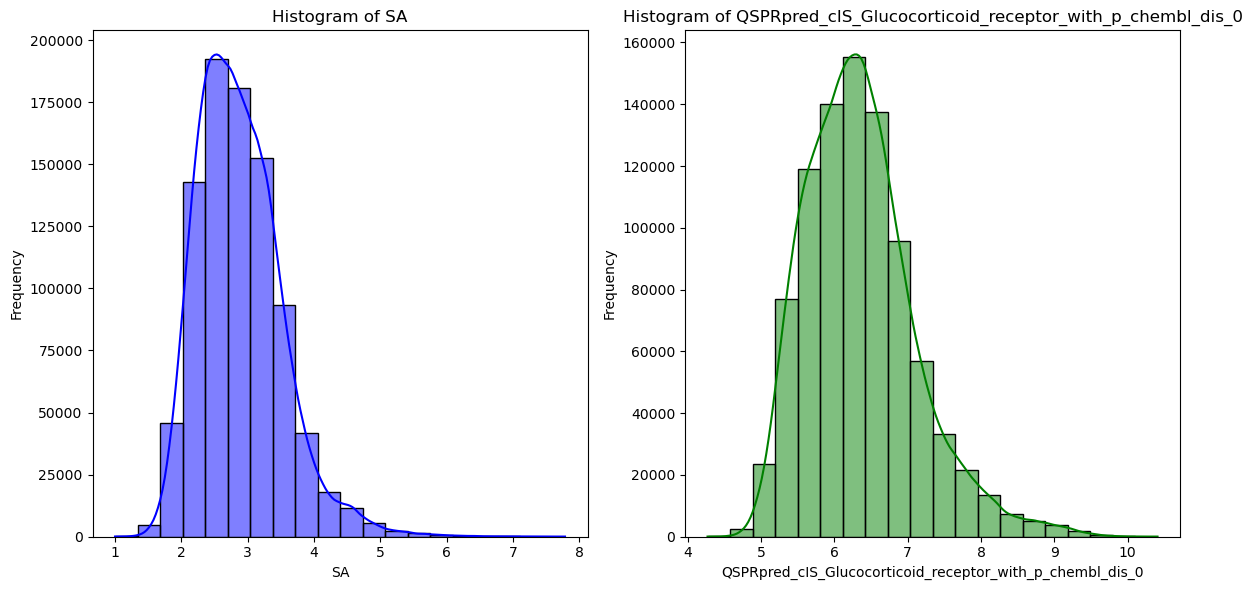

/tmp/ipykernel_23259/2645977934.py:2: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


DF1  1000000


/tmp/ipykernel_23259/2645977934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/tmp/ipykernel_23259/2645977934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'] = pd.to_numeric(morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'], errors='coerce')


DF2  895092
DF3  154045


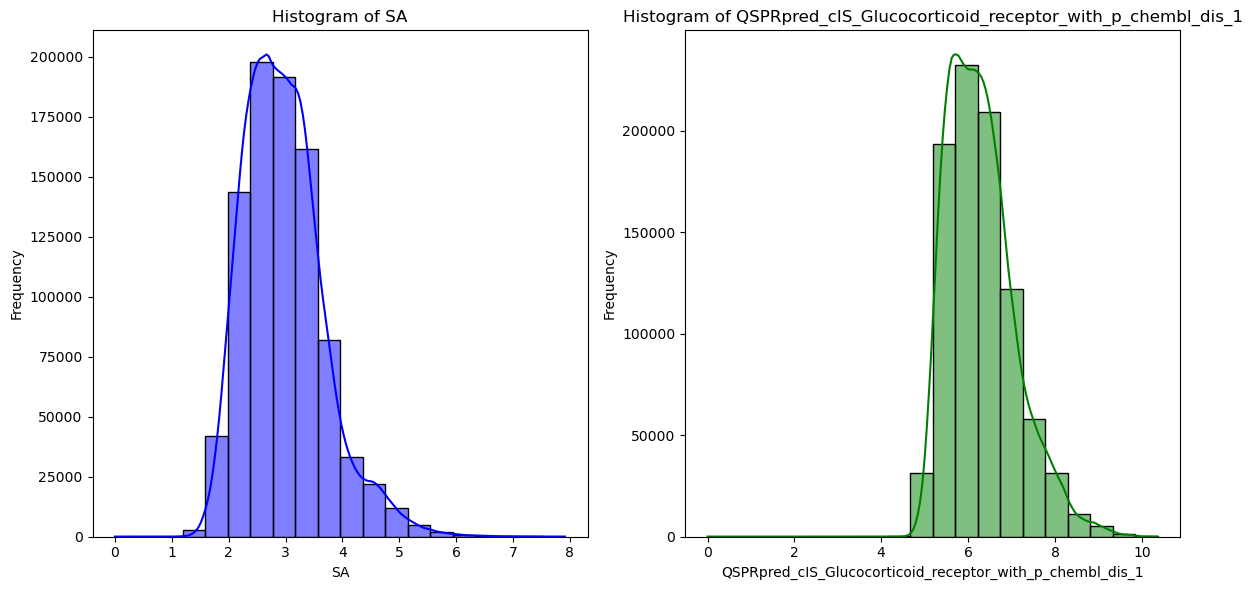

/tmp/ipykernel_23259/2645977934.py:2: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


DF1  1000000


/tmp/ipykernel_23259/2645977934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/tmp/ipykernel_23259/2645977934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'] = pd.to_numeric(morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'], errors='coerce')


DF2  908111
DF3  141521


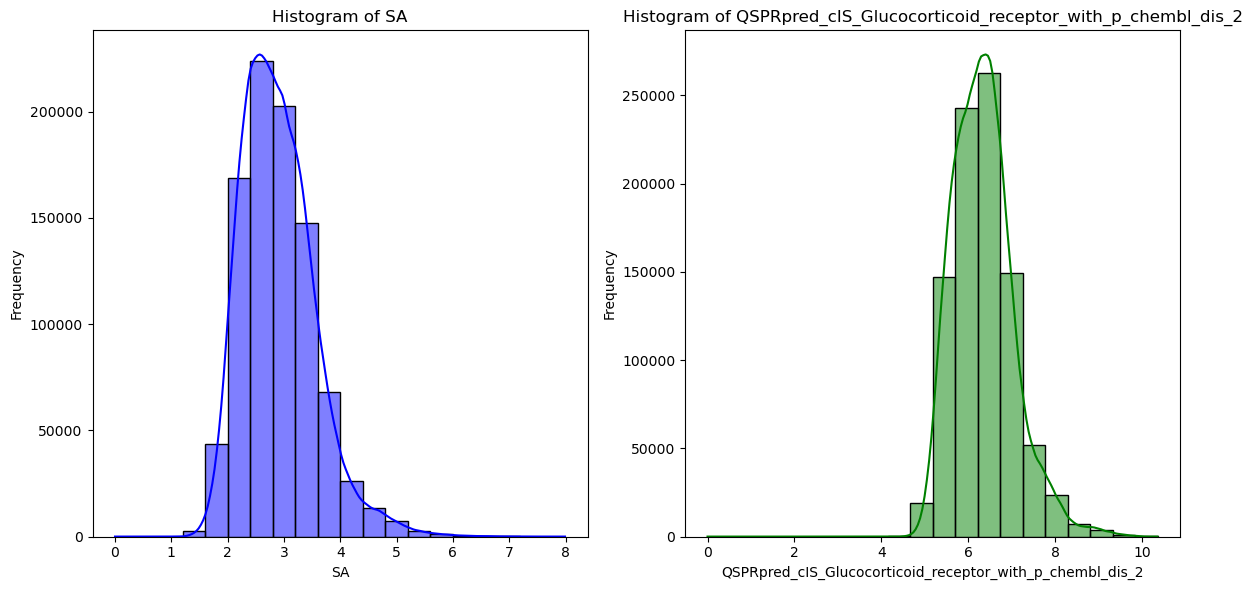

/tmp/ipykernel_23259/2645977934.py:2: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


DF1  1000000


/tmp/ipykernel_23259/2645977934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/tmp/ipykernel_23259/2645977934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'] = pd.to_numeric(morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'], errors='coerce')


DF2  888291
DF3  150181


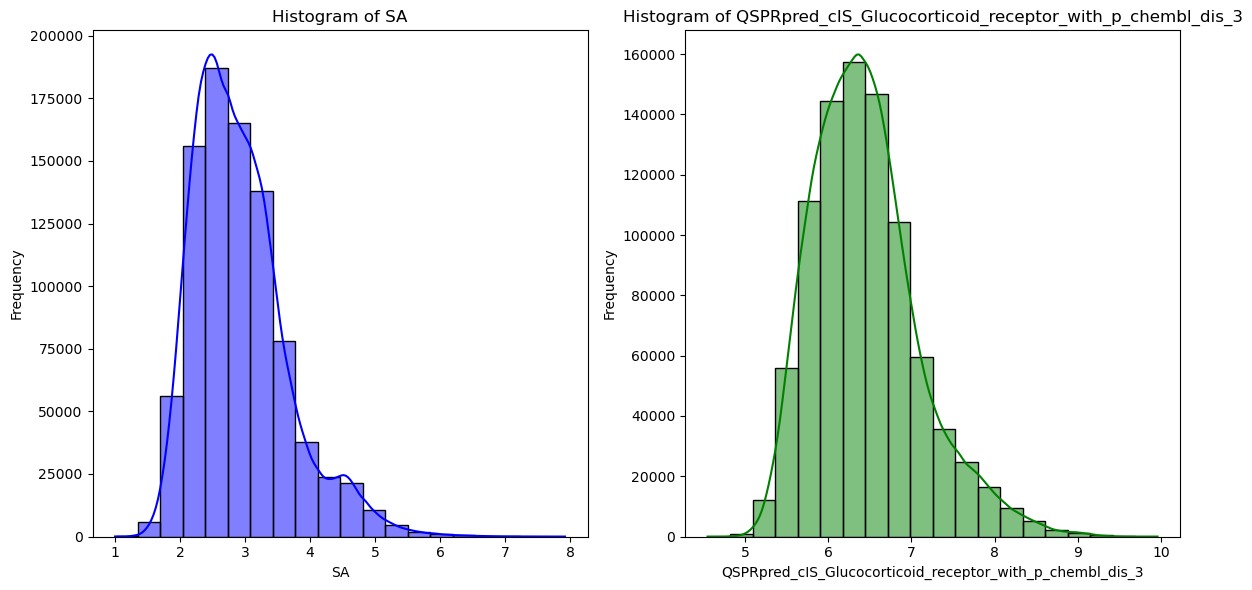

/tmp/ipykernel_23259/2645977934.py:2: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


DF1  1000000


/tmp/ipykernel_23259/2645977934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/tmp/ipykernel_23259/2645977934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'] = pd.to_numeric(morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'], errors='coerce')


DF2  915174
DF3  140483


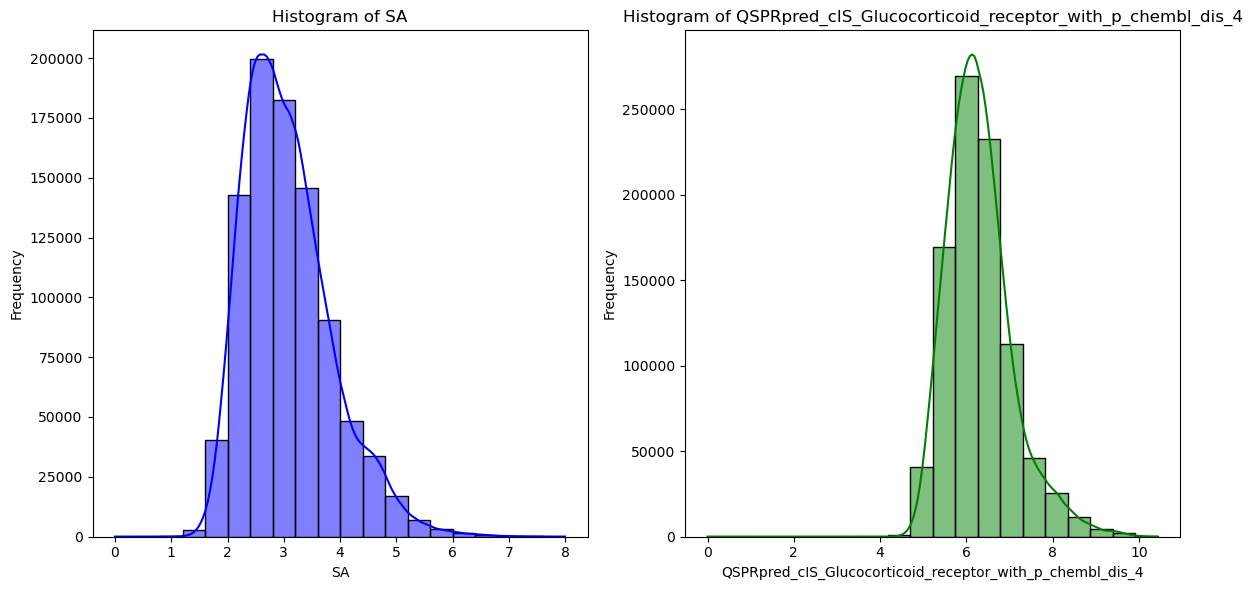

In [61]:
for number in numbers:
    df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")
    delete_row = df.index[df.SMILES=='SMILES'].tolist()
    df = df.drop(delete_row)
    print("DF1 ", len(df))
    morphs = df.drop_duplicates(subset='SMILES', keep='last')
    # Převod na numerické hodnoty
    morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
    morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'] = pd.to_numeric(morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'], errors='coerce')
    print("DF2 ", len(morphs))
    # Filtrování na základě obou podmínek
    filtered_morphs = morphs[(morphs['SA'] <= 6) & (morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'] >= 7)]
    print("DF3 ", len(filtered_morphs))
    #filtered_morphs.SMILES.to_csv(f"data/output_sets/{receptor}/cOS_{generator}_desired_{type_cluster}_{number}_one_column.csv", header=False, index=False)


    # Nastavení velikosti grafu
    plt.figure(figsize=(12, 6))

    # Plot pro SA
    plt.subplot(1, 2, 1)
    sns.histplot(morphs['SA'].dropna(), kde=True, color='blue', bins=20)
    plt.title('Histogram of SA')
    plt.xlabel('SA')
    plt.ylabel('Frequency')

    # Plot pro QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_dis_0
    plt.subplot(1, 2, 2)
    sns.histplot(morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'].dropna(), kde=True, color='green', bins=20)
    plt.title(f'Histogram of QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}')
    plt.xlabel(f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}')
    plt.ylabel('Frequency')

    # Zobrazení grafu
    plt.tight_layout()
    plt.show()


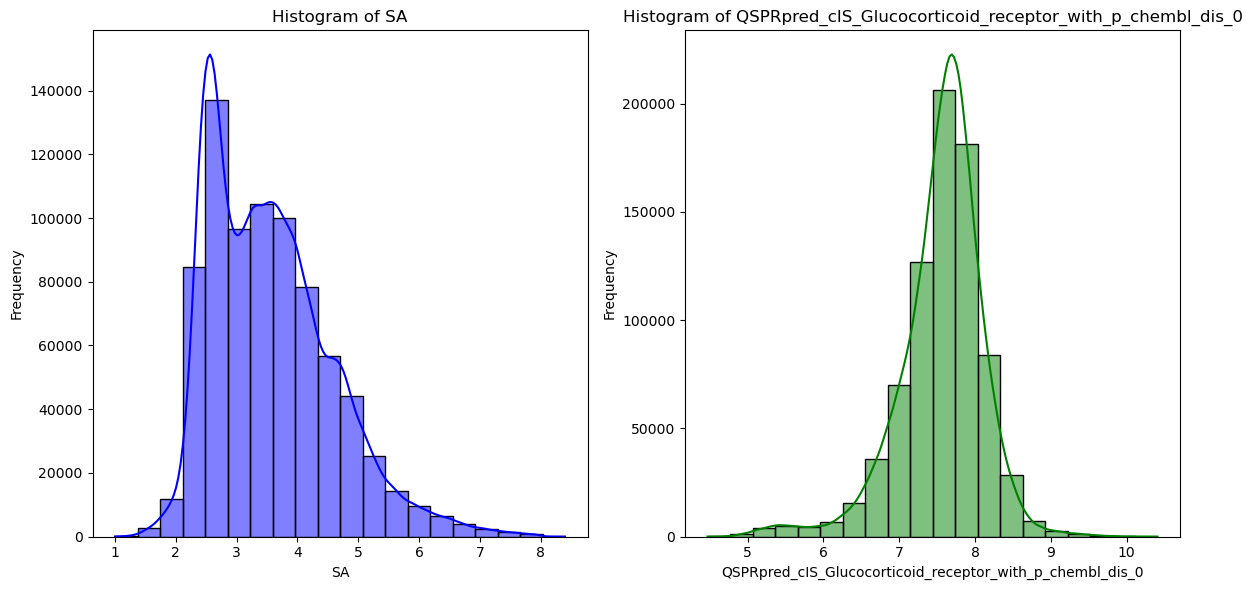

# REINVENT

In [34]:
number = 4
receptor = 'Glucocorticoid_receptor' 
type_cluster = 'sim'
generator = 'REINVENT' 

In [35]:
df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")
df

,SMILES,NLL
0,CC1=C(C)CC(C(=O)O)C(C(=O)O)C1,19.460482
1,CCc1nc2c(C)cc(C)nc2n1Cc1ccc(-c2occc2C(=O)O)cc1,24.654335
2,Cc1ccc(NS(=O)(=O)c2c(C)[nH]c(=O)[nH]c2=O)cc1C,20.233723
3,CC(C)(C)OC(=O)N1CCN(c2ccc(NC(=O)N3Cc4ccccc4C3)...,20.258762
4,COC1=CC(C)(Cc2cc(CNc3ccc(OC)cc3)c(OC)c(OC)c2)C...,39.130318
...,...,...
1065475,OCC1CCOC1OC(c1ccccc1)(C(F)(F)F)C(F)(F)F,31.750027
1065476,COc1ccccc1N1CCN(CC(Cc2ccc(O)cc2)NC(=O)CCc2ccc(...,28.032434
1065477,N=c1nc(N2CCOCC2)c2[nH]c3c[nH]nc3c2[nH]1,30.179611
1065478,Cc1ccc(CN(Cc2nc(=O)c3cnn(C)c3[nH]2)C2CCCCC2)s1,26.203688


In [36]:
virtual_compounds = df.SMILES
len(virtual_compounds)

1065480

In [37]:
virtual_compounds.to_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_one_column.csv", header=False, index=False)